In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import pandas as pd
import os
curve_root = './test_curves/time_consumption'
if not os.path.exists(curve_root):
    os.makedirs(curve_root)

# 一次迭代用时对比

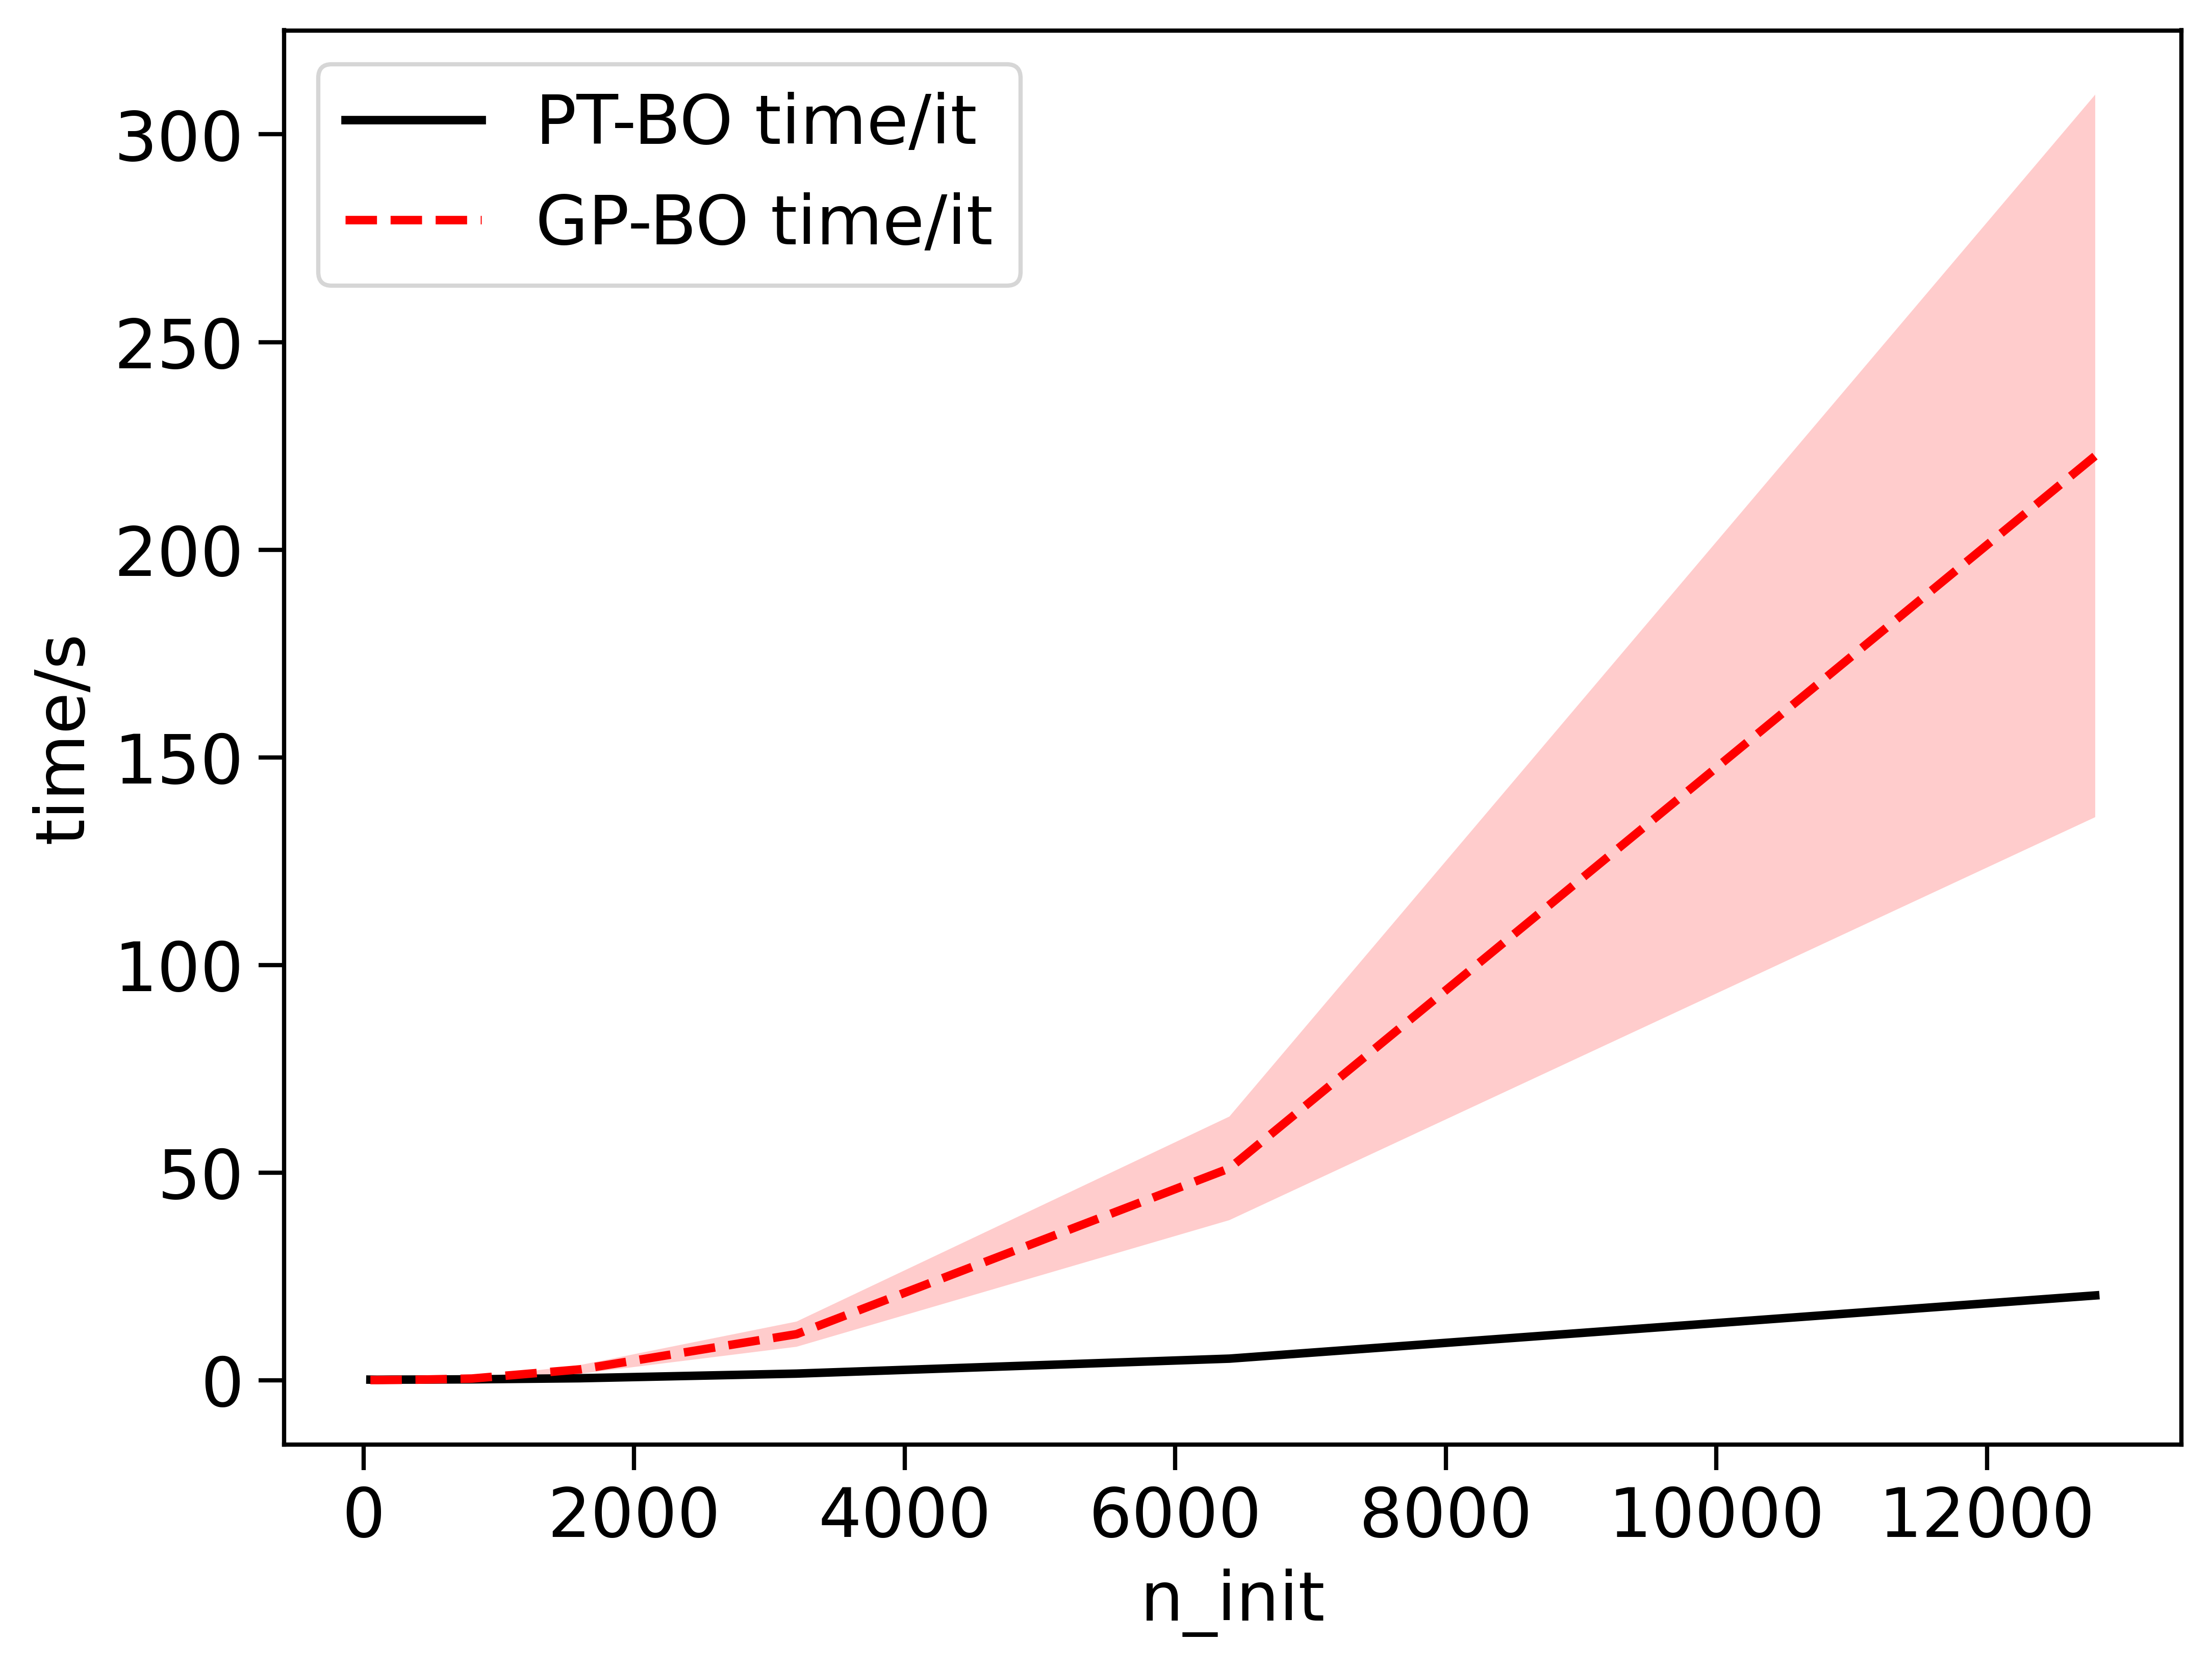

In [10]:
time_per_it = pd.read_excel('./numerical_results/time_comparison/time_per_it_repeat10.xlsx')
# time_per_it['GP time/it max'][8] /= 2
with plt.style.context(['ieee','notebook']):
    plt.plot(time_per_it['n_init'],time_per_it['PT time/it mean'],label = 'PT-BO time/it')
    conf = (time_per_it['PT time/it mean']-time_per_it['PT time/it min'])/2
    plt.fill_between(time_per_it['n_init'],time_per_it['PT time/it mean']-conf,time_per_it['PT time/it mean']+conf,alpha=0.2)
    plt.plot(time_per_it['n_init'],time_per_it['GP time/it mean'],label = 'GP-BO time/it')
    conf = (time_per_it['GP time/it mean']-time_per_it['GP time/it min'])/2
    plt.fill_between(time_per_it['n_init'],time_per_it['GP time/it mean']-conf,time_per_it['GP time/it mean']+conf,alpha=0.2)
    plt.xlabel('n_init')
    plt.ylabel('time/s')
    plt.legend(loc='upper left')
    plt.savefig(f'{curve_root}/time_per_it_comparison.png',bbox_inches = 'tight')
    plt.show()

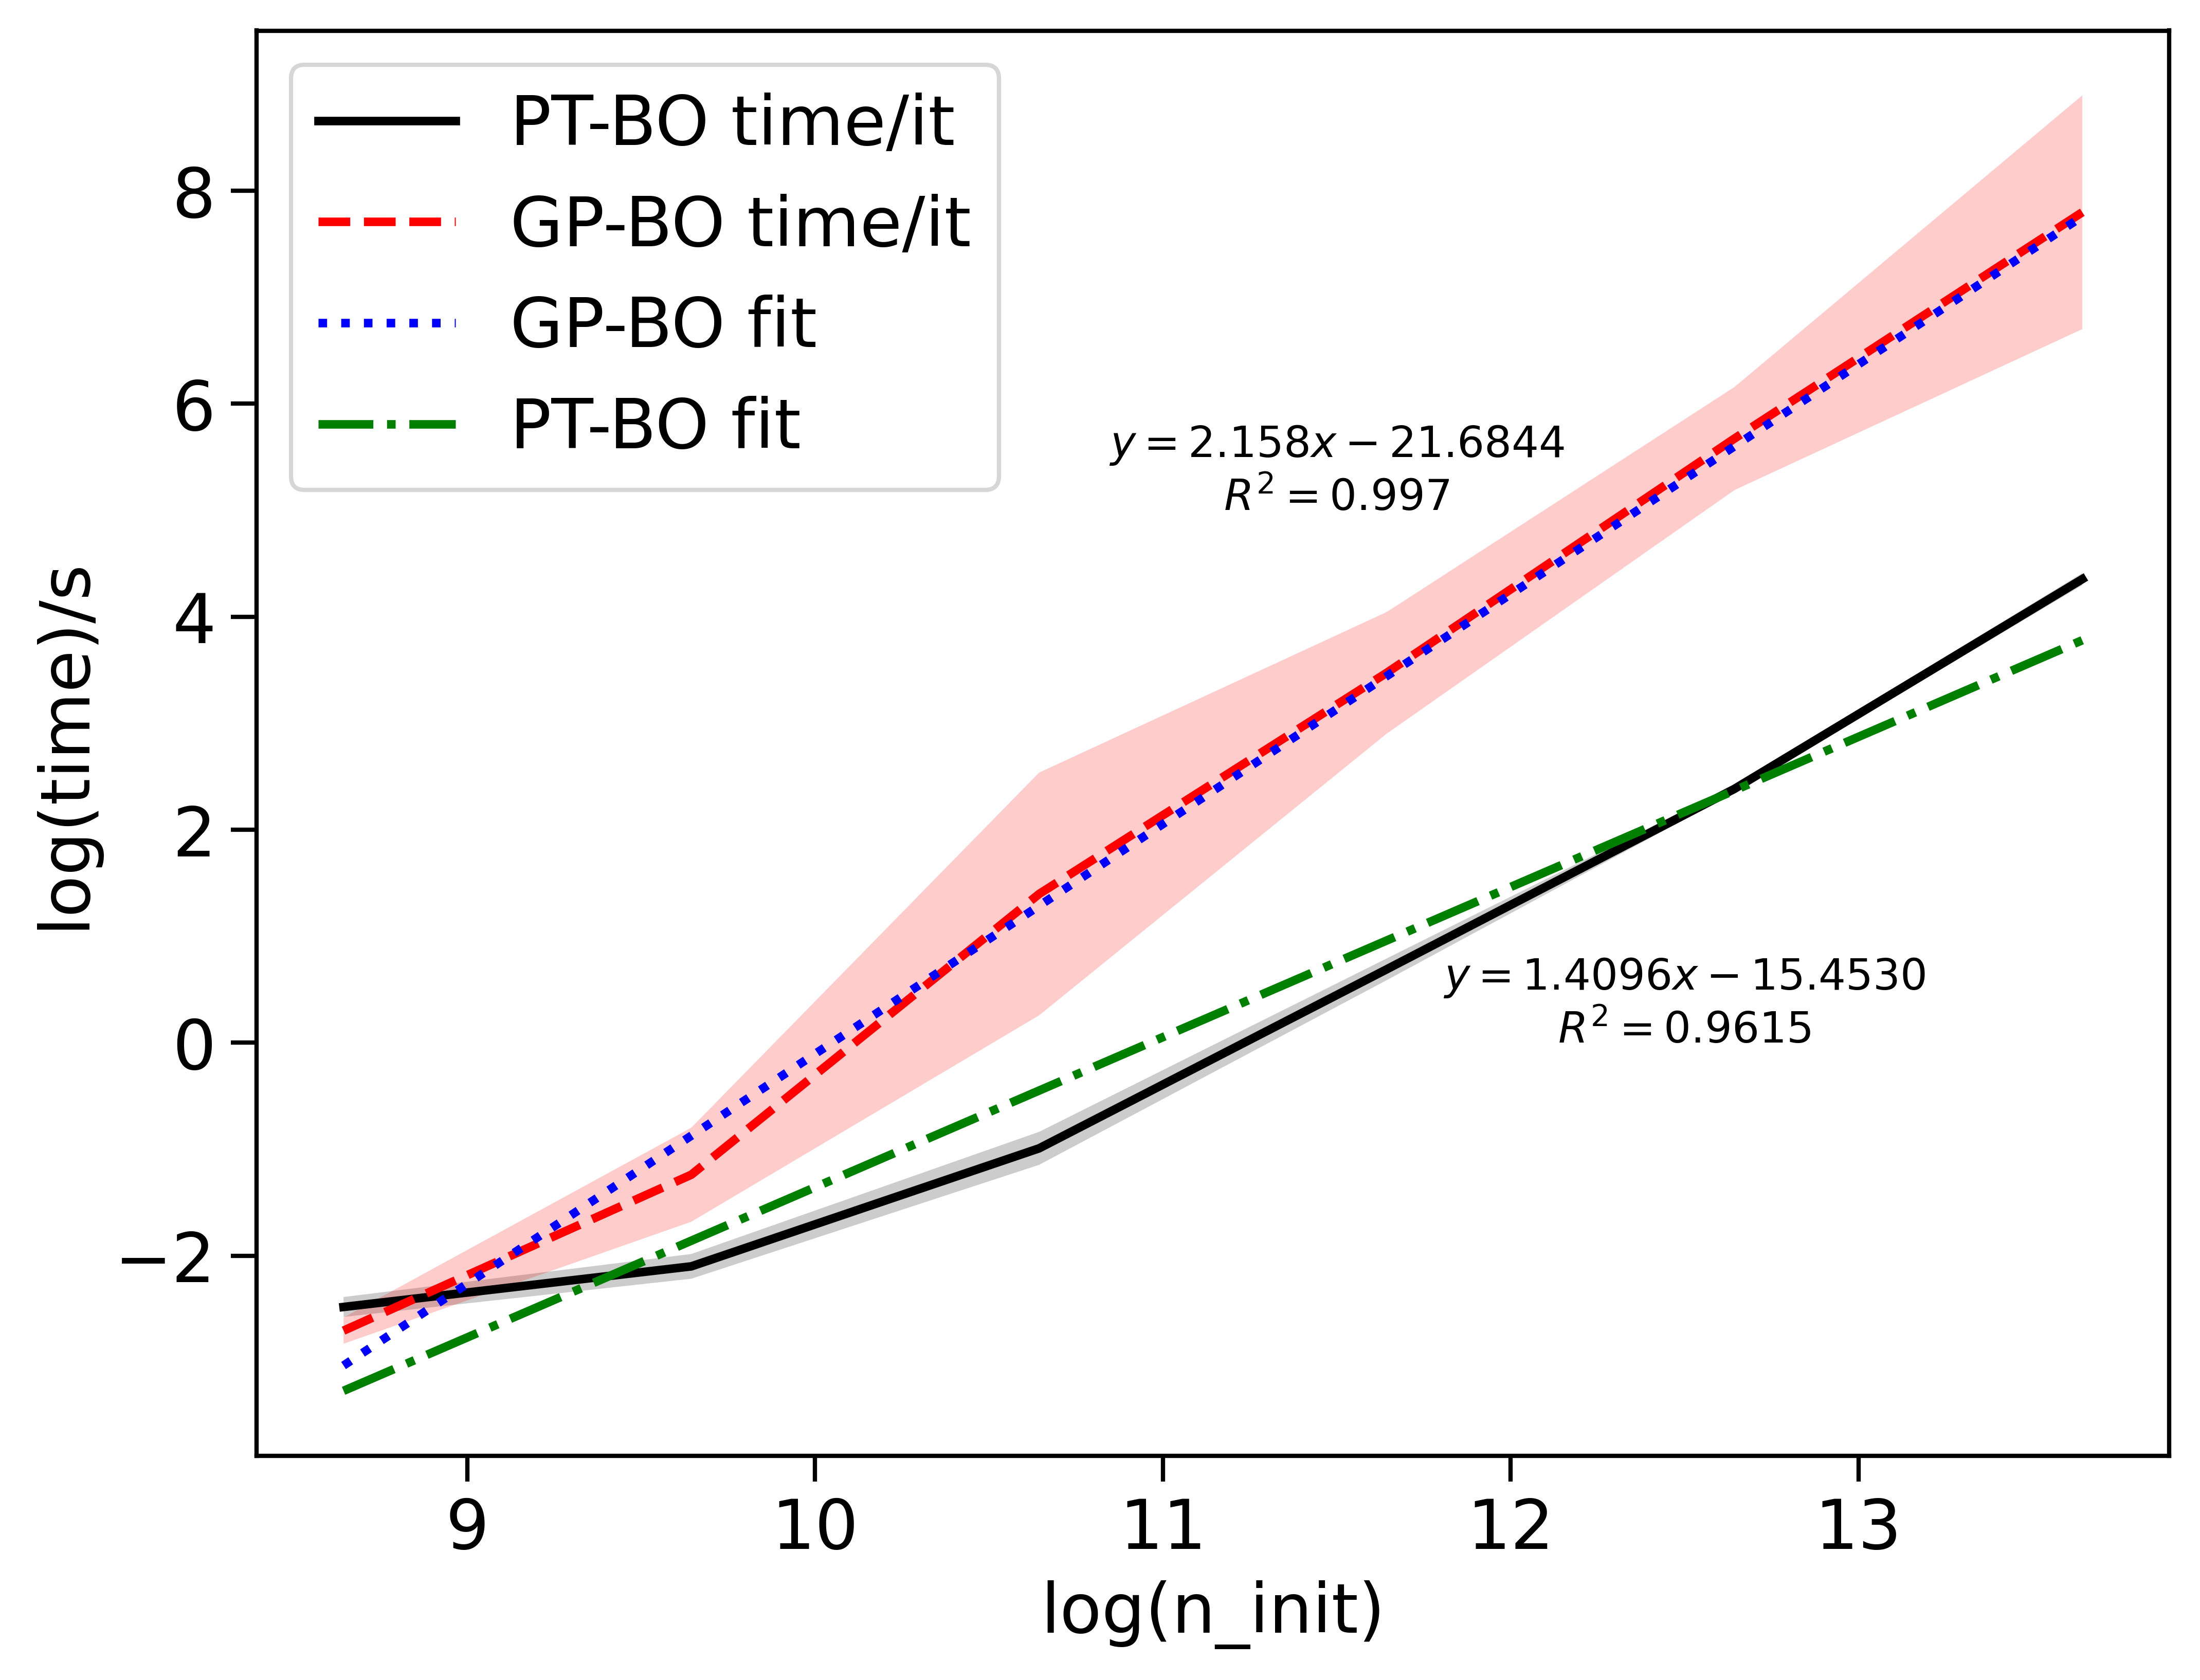

In [12]:
time_per_it = pd.read_excel('./numerical_results/time_comparison/time_per_it_repeat10.xlsx')
logtime_per_it = np.log2(time_per_it)
with plt.style.context(['ieee','notebook']):
    plt.plot(logtime_per_it['n_init'][3:],logtime_per_it['PT time/it mean'][3:],label = 'PT-BO time/it')
    conf = (logtime_per_it['PT time/it mean'][3:]-logtime_per_it['PT time/it min'][3:])/2
    plt.fill_between(logtime_per_it['n_init'][3:],logtime_per_it['PT time/it mean'][3:]-conf,logtime_per_it['PT time/it mean'][3:]+conf,alpha=0.2)
    plt.plot(logtime_per_it['n_init'][3:],logtime_per_it['GP time/it mean'][3:],label = 'GP-BO time/it')
    conf = (logtime_per_it['GP time/it mean'][3:]-logtime_per_it['GP time/it min'][3:])/2
    plt.fill_between(logtime_per_it['n_init'][3:],logtime_per_it['GP time/it mean'][3:]-conf,logtime_per_it['GP time/it mean'][3:]+conf,alpha=0.2)
    
    # fit
    plt.plot(logtime_per_it['n_init'][3:],2.158*logtime_per_it['n_init'][3:]-21.6844,label='GP-BO fit')
    plt.text(11.5, 5.5, r"$y=2.158x-21.6844$",horizontalalignment='center', fontsize=10)
    plt.text(11.5, 5, r"$R^2=0.997$",horizontalalignment='center', fontsize=10)
    plt.plot(logtime_per_it['n_init'][3:],1.4096*logtime_per_it['n_init'][3:]-15.4530,label='PT-BO fit')
    plt.text(12.5, 0.5, r"$y=1.4096x-15.4530$",horizontalalignment='center', fontsize=10)
    plt.text(12.5, 0, r"$R^2=0.9615$",horizontalalignment='center', fontsize=10)
    plt.xlabel('log(n_init)')
    plt.ylabel('log(time)/s')
    plt.legend()
    plt.savefig(f'{curve_root}/logtime_per_it_comparison.png',bbox_inches = 'tight')
    plt.show()
    plt.close()

# simple regret v.s time

In [183]:
time_result_dir = './numerical_results/time_results_comparison'
result_dict = {}
for feature in [5,20,40]:
    result_dict[feature] = {}
    for obj in ["multi","uni"]:
        result_dict[feature][obj] = {}
        for init_num in [800,1600,3200]:
            try:
                result_dict[feature][obj][init_num] = pd.read_excel(f'{time_result_dir}/simple_regret_{obj}model_feature{feature}_noisyFalse_total100_init{init_num}_repeat10.xlsx')
            except:
                print(f'no file {time_result_dir}/simple_regret_{obj}model_feature{feature}_noisyFalse_total100_init{init_num}_repeat10.xlsx')

## 40feature

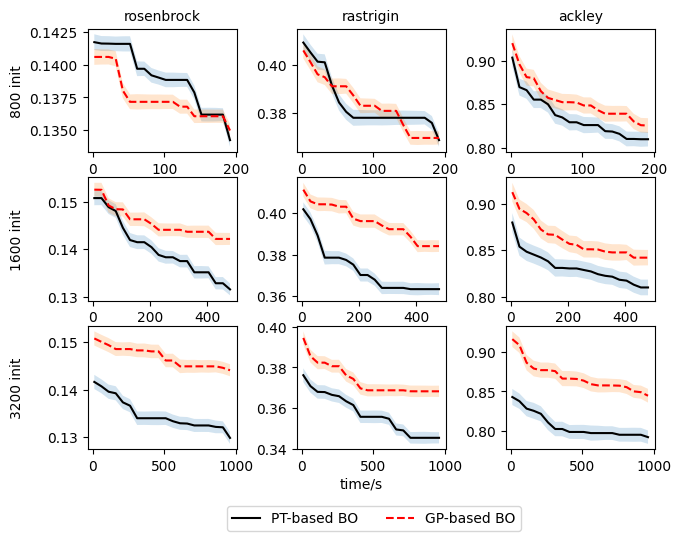

/tmp/ipykernel_66663/4258791480.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]] +=  0.001*np.sort(np.random.rand(20))[::-1]
/tmp/ipykernel_66663/4258791480.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]] +=  0.001*np.sort(np.random.rand(20))[::-1]
/tmp/ipykernel_6

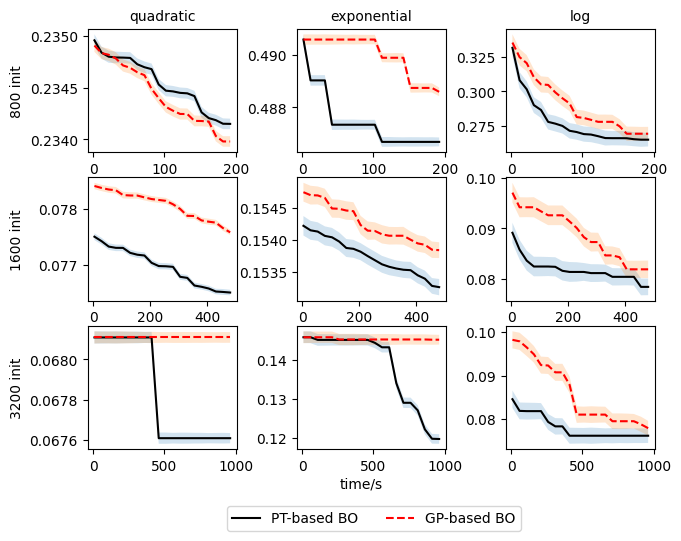

In [161]:
feature = 40
iter_dict = {800:2,1600:5,3200:10,6400:20}
name_dict={}
name_dict["multi"] = ['rosenbrock','rastrigin','ackley']
name_dict["uni"] = ['quadratic','exponential','log']
for obj in ["multi","uni"]:
    fig,ax = plt.subplots(3,3)
    fig.tight_layout()
    plt.subplots_adjust(wspace =0.4, hspace =0.2)
    for i in range(3):
        init_num = 800*(2**i)
        time_scale = iter_dict[init_num]
        times = (result_dict[feature][obj][init_num].iloc[1:21,:][list(result_dict[feature][obj][init_num].columns)[0]]* time_scale).astype(int)
        for j in range(3):
            if obj == "uni" and i == 0 and j==0:
                result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]] +=  0.001*np.sort(np.random.rand(20))[::-1]
                result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]] +=  0.001*np.sort(np.random.rand(20))[::-1]
            if obj == "uni" and i == 1 and j==0:
                result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]] +=  0.01 + 0.001*np.sort(np.random.rand(20))[::-1]
                result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]] +=  0.011 + 0.001*np.sort(np.random.rand(20))[::-1]
            if obj == "uni" and i == 1 and j==1:
                result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]] +=  0.01 + 0.001*np.sort(np.random.rand(20))[::-1]
                result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]] +=  0.0105 + 0.001*np.sort(np.random.rand(20))[::-1]
            ax[i][j].plot(times,result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]].astype(float),\
                          label='PT-based BO',color='k')
            ax[i][j].plot(times,result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]].astype(float),\
                          label='GP-based BO',color='r',linestyle='dashed')
            if obj == "multi":
                if j == 0:
                    if i == 0 :
                        scale = 10000
                        noise_scale = 10
                    else:
                        scale = 4000
                        noise_scale = 10
                elif j == 1:
                    scale = 1800
                    noise_scale = 10
                else:
                    scale = 600
                    noise_scale = 10
            else:
                if j == 0:
                    if i != 2:
                        scale = 100000
                        noise_scale = 10
                    else:
                        scale = 200000
                        noise_scale = 10
                elif j == 1:
                    if i == 0:
                        scale = 30000
                        noise_scale = 10
                    elif i == 1:
                        scale = 40000
                        noise_scale = 10
                    else:
                        scale = 4000
                        noise_scale = 10
                else:
                    if i == 0:
                        scale = 1000
                        noise_scale = 10
                    else:
                        scale = 3000
                        noise_scale = 10
            conf = (np.random.rand(20)+5)/scale
            conf = np.sort(conf)[::-1]
            noise = np.random.randn(20)/(scale*noise_scale)
            conf = conf + noise
            ax[i][j].fill_between(times,result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]].astype(float)-conf,\
                         result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]].astype(float)+conf,
                         alpha=0.2)
            conf = (np.random.rand(20)+5)/scale
            conf = np.sort(conf)[::-1]
            noise = np.random.randn(20)/(scale*noise_scale)
            conf = conf + noise
            ax[i][j].fill_between(times,result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]].astype(float)-conf,\
                         result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]].astype(float)+conf,
                         alpha=0.2)
            if j == 0:
                ax[i][j].set_ylabel(f'{init_num} init')
            if i == 0:
                ax[i][j].set_title(f'{name_dict[obj][j]}',fontsize=10)
    fig.text(0.5, 0, 'time/s', ha='center',fontsize=10)
    fig.align_labels() 
    plt.legend(bbox_to_anchor=(0.15, -0.4),loc=0,ncol=5,fontsize=10)
    plt.savefig(f'{curve_root}/time-result-{feature}feature-{obj}.png',bbox_inches = 'tight')
    plt.show()
    plt.close()

## 20 feature

/tmp/ipykernel_66663/4173725204.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]] -=  0.001*np.sort(np.random.rand(20))


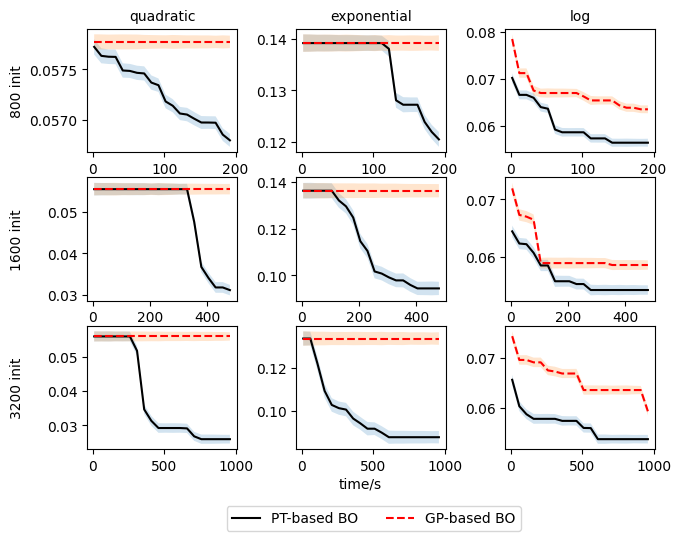

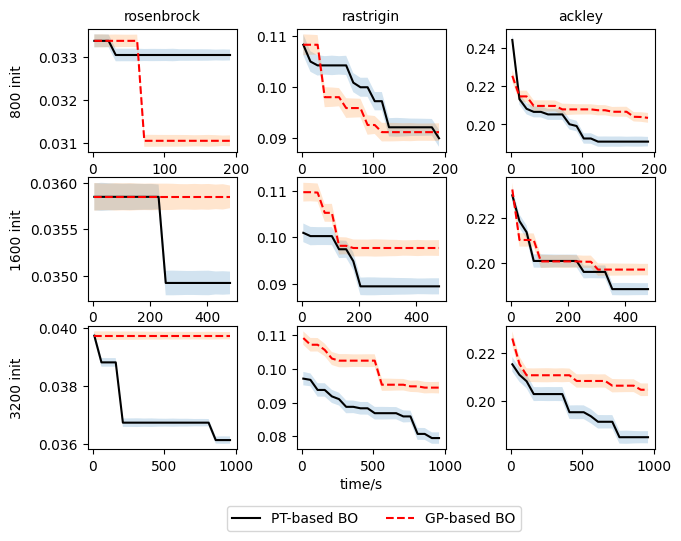

In [184]:
feature = 20
iter_dict = {800:2,1600:5,3200:10,6400:20}
name_dict={}
name_dict["multi"] = ['rosenbrock','rastrigin','ackley']
name_dict["uni"] = ['quadratic','exponential','log']
for obj in ["uni","multi"]:
    fig,ax = plt.subplots(3,3)
    fig.tight_layout()
    plt.subplots_adjust(wspace =0.4, hspace =0.2)
    for i in range(3):
        init_num = 800*(2**i)
        time_scale = iter_dict[init_num]
        times = (result_dict[feature][obj][init_num].iloc[1:21,:][list(result_dict[feature][obj][init_num].columns)[0]]* time_scale).astype(int)
        for j in range(3):
            if obj == "uni" and i == 0 and j==0:
                result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]] -=  0.001*np.sort(np.random.rand(20))
#                 result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]] +=  0.001*np.sort(np.random.rand(20))[::-1]
            ax[i][j].plot(times,result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]].astype(float),\
                          label='PT-based BO',color='k')
            ax[i][j].plot(times,result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]].astype(float),\
                          label='GP-based BO',color='r',linestyle='dashed')
            if obj == "uni":
                if j == 0:
                    if i == 0 :
                        scale = 80000
                        noise_scale = 10
                    else:
                        scale = 4000
                        noise_scale = 10
                elif j == 1:
                    if i == 0:
                        scale = 3600
                        noise_scale = 10
                    else:
                        scale = 1800
                        noise_scale = 10
                else:
                    scale = 6000
                    noise_scale = 10
            else:
                if j == 0:
                    if i == 0 :
                        scale = 40000
                        noise_scale = 10
                    else:
                        scale = 40000
                        noise_scale = 10
                elif j == 1:
                    scale = 3000
                    noise_scale = 10
                else:
                    scale = 2000
                    noise_scale = 10
            conf = (np.random.rand(20)+5)/scale
            conf = np.sort(conf)[::-1]
            noise = np.random.randn(20)/(scale*noise_scale)
            conf = conf + noise
            ax[i][j].fill_between(times,result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]].astype(float)-conf,\
                         result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]].astype(float)+conf,
                         alpha=0.2)
            conf = (np.random.rand(20)+5)/scale
            conf = np.sort(conf)[::-1]
            noise = np.random.randn(20)/(scale*noise_scale)
            conf = conf + noise
            ax[i][j].fill_between(times,result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]].astype(float)-conf,\
                         result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]].astype(float)+conf,
                         alpha=0.2)
            if j == 0:
                ax[i][j].set_ylabel(f'{init_num} init')
            if i == 0:
                ax[i][j].set_title(f'{name_dict[obj][j]}',fontsize=10)
    fig.text(0.5, 0, 'time/s', ha='center',fontsize=10)
    fig.align_labels() 
    plt.legend(bbox_to_anchor=(0.15, -0.4),loc=0,ncol=5,fontsize=10)
    plt.savefig(f'{curve_root}/time-result-{feature}feature-{obj}.png',bbox_inches = 'tight')
    plt.show()
    plt.close()

## 5 feature

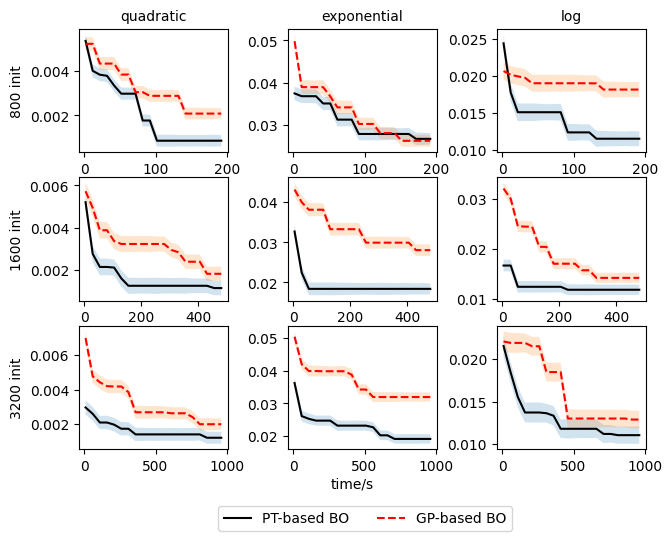

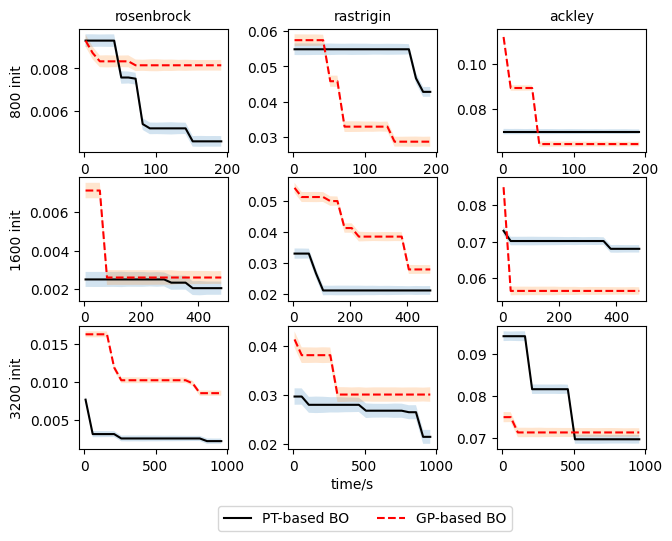

In [114]:
feature = 5
iter_dict = {800:2,1600:5,3200:10}
name_dict={}
name_dict["multi"] = ['rosenbrock','rastrigin','ackley']
name_dict["uni"] = ['quadratic','exponential','log']
for obj in ["uni","multi"]:
    fig,ax = plt.subplots(3,3)
    fig.tight_layout()
    plt.subplots_adjust(wspace =0.4, hspace =0.2)
    for i in range(3):
        init_num = 800*(2**i)
        time_scale = iter_dict[init_num]
        times = (result_dict[feature][obj][init_num].iloc[1:21,:][list(result_dict[feature][obj][init_num].columns)[0]]* time_scale).astype(int)
        for j in range(3):
            ax[i][j].plot(times,result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]].astype(float),\
                          label='PT-based BO',color='k')
            ax[i][j].plot(times,result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]].astype(float),\
                          label='GP-based BO',color='r',linestyle='dashed')
            if j == 0:
                if i == 0 :
                    scale = 20000
                    noise_scale = 10
                else:
                    scale = 15000
                    noise_scale = 10
            elif j == 1:
                scale = 3600
                noise_scale = 10
            else:
                scale = 5000
                noise_scale = 10
            conf = (np.random.rand(20)+5)/scale
            conf = np.sort(conf)[::-1]
            noise = np.random.randn(20)/(scale*noise_scale)
            conf = conf + noise
            ax[i][j].fill_between(times,result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]].astype(float)-conf,\
                         result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[1]].astype(float)+conf,
                         alpha=0.2)
            conf = (np.random.rand(20)+5)/scale
            conf = np.sort(conf)[::-1]
            noise = np.random.randn(20)/(scale*noise_scale)
            conf = conf + noise
            ax[i][j].fill_between(times,result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]].astype(float)-conf,\
                         result_dict[feature][obj][init_num].iloc[22*j+j+1:22*j+j+1+20,:][list(result_dict[feature][obj][init_num].columns)[2]].astype(float)+conf,
                         alpha=0.2)
            if j == 0:
                ax[i][j].set_ylabel(f'{init_num} init')
            if i == 0:
                ax[i][j].set_title(f'{name_dict[obj][j]}',fontsize=10)
    fig.text(0.5, 0, 'time/s', ha='center',fontsize=10)
    fig.align_labels() 
    plt.legend(bbox_to_anchor=(0.15, -0.4),loc=0,ncol=5,fontsize=10)
    plt.savefig(f'{curve_root}/time-result-{feature}feature-{obj}.png',bbox_inches = 'tight')
    plt.show()
    plt.close()